In [68]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

from sklearn.model_selection import KFold, cross_val_score, train_test_split

df = pd.read_excel('data/data-rumah-class-test.xlsx')
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS,class
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0,2
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4,1
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0,1
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3,0


In [69]:
#check count of each class

df['class'].value_counts()

2    339
1    338
0    333
Name: class, dtype: int64

In [70]:
#define predictor and target for classification

target = 'class'
predictor = ['LB','LT','KT','KM','GRS']
X = df[target]
y = df[predictor]

print(X.head())
print(y.head())

0    2
1    2
2    1
3    1
4    0
Name: class, dtype: int64
    LB   LT  KT  KM  GRS
0  220  220   3   3    0
1  180  137   4   3    2
2  267  250   4   4    4
3   40   25   2   2    0
4  400  355   6   5    3


In [71]:
#split data to training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(808,)
(808, 5)
(202,)
(202, 5)


In [72]:
X_train_categorical = to_categorical(X_train)
X_test_categorical = to_categorical(X_test)

print(X_train_categorical.shape)
print(X_test_categorical.shape)

(808, 3)
(202, 3)


In [73]:
#creating model sequential

model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [74]:
#compile kelas model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
# fit the keras model on the dataset

model.fit(y_train, X_train_categorical, epochs=150)

Epoch 1/150
808/808 [==============================] - 0s 207us/step - loss: 6.1425 - accuracy: 0.5578
Epoch 2/150
808/808 [==============================] - 0s 94us/step - loss: 1.2990 - accuracy: 0.6093
Epoch 3/150
808/808 [==============================] - 0s 70us/step - loss: 0.6800 - accuracy: 0.6345
Epoch 4/150
808/808 [==============================] - 0s 65us/step - loss: 0.5719 - accuracy: 0.7306
Epoch 5/150
808/808 [==============================] - 0s 73us/step - loss: 0.5666 - accuracy: 0.7417
Epoch 6/150
808/808 [==============================] - 0s 77us/step - loss: 0.5623 - accuracy: 0.7434
Epoch 7/150
808/808 [==============================] - 0s 83us/step - loss: 0.5583 - accuracy: 0.7426
Epoch 8/150
808/808 [==============================] - 0s 63us/step - loss: 0.5534 - accuracy: 0.7438
Epoch 9/150
808/808 [==============================] - 0s 48us/step - loss: 0.5486 - accuracy: 0.7364
Epoch 10/150
808/808 [==============================] - 0s 49us/step - loss: 0.54

In [76]:
#evaluate train data

scores = model.evaluate(y_train, X_train_categorical)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

808/808 [==============================] - 0s 51us/step
Accuracy on training data: 0.824257493019104% 
 Error on training data: 0.175742506980896


In [77]:
dataTesting = y_test
predictions = model.predict_classes(dataTesting)
predictions

array([2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 0,
       0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1,
       0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1,
       0, 2, 1, 0], dtype=int64)

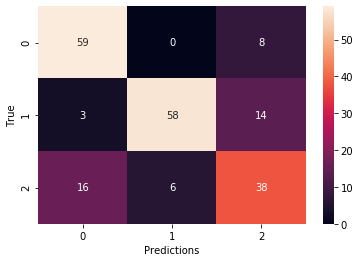

In [78]:
#evaluation confussion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

matrix = confusion_matrix(X_test, predictions)
sn.heatmap(matrix, annot=True)
plt.xlabel("Predictions")
plt.ylabel("True") 
plt.show()

In [79]:
#check accuration score from confussion matrix using library

from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(X_test, predictions)))
print('Error Rate: {:.2f}\n'.format(1 - accuracy_score(X_test, predictions)))


Accuracy: 0.77
Error Rate: 0.23



In [80]:
#check accuration score from confussion matrix using mathematics

accuration = (matrix[0,0]+matrix[1,1]+matrix[2,2])/len(predictions)
print('Accuracy: {}'.format(accuration))
print('Error Rate: {}\n'.format(1 - accuration))

Accuracy: 0.7673267326732673
Error Rate: 0.23267326732673266

